In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [7]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')
print(data.head())
print(data.info())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [8]:

# Drop duplicates or missing values
data = data.drop_duplicates()
data = data.dropna(subset=['Rating'])  # Corrected column name

# Fill missing values in text columns with 'Unknown'
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']: # Corrected column names
    if col in data.columns:
        data[col] = data[col].fillna('Unknown')

In [9]:
label_enc = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    if col in data.columns:
        data[col] = label_enc.fit_transform(data[col])

# Convert 'Year' to numeric, coercing errors
data['Year'] = pd.to_numeric(data['Year'].str.replace(r'[()]', '', regex=True), errors='coerce')

# Convert 'Duration' to numeric, coercing errors
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''), errors='coerce')

# Convert 'Votes' to numeric, coercing errors after removing commas
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')

# Drop any rows that might have become NaN after conversion
data.dropna(subset=['Year', 'Duration', 'Votes'], inplace=True)

In [10]:
# Replace 'IMDB_Rating' with your target column name if different
X = data.drop(['Rating', 'Name'], axis=1)
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 0.8485738684884714
Mean Squared Error: 1.2670265960717333
R² Score: 0.31899199558936686


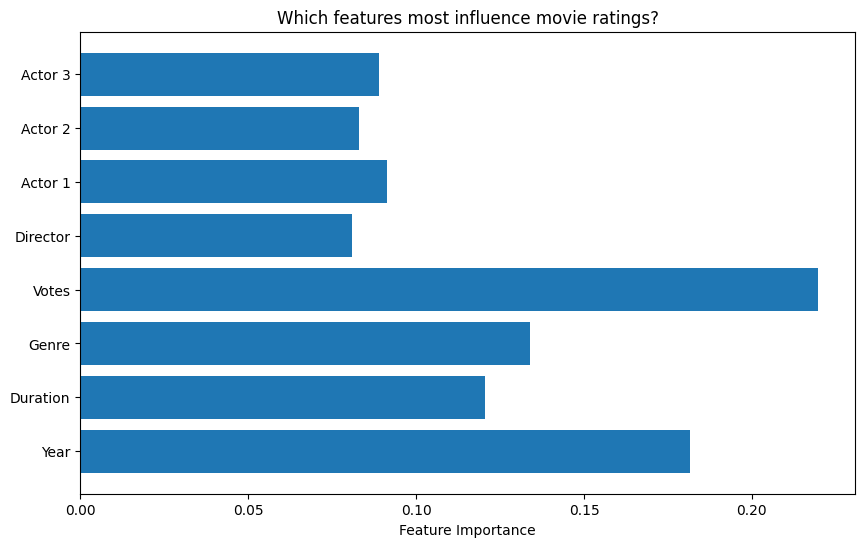

In [11]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.title("Which features most influence movie ratings?")
plt.show()